# Data Exploration

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Getting Data

In [2]:
date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-09-01
2020-09-02
2020-09-03
2020-09-04
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
	does not exist jet


In [3]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [4]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-09-01T00:00:51,5.30,NaN,NaN,1.77,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-09-01T00:03:23,8.00,NaN,NaN,1.83,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-09-01T00:05:59,3.43,NaN,NaN,1.70,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-09-01T00:08:29,5.40,NaN,NaN,2.00,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-09-01T00:11:00,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
580,6842,SDS011,3460,52.028,8.916,2020-09-19T23:49:17,4.20,NaN,NaN,1.80,NaN,NaN
581,6842,SDS011,3460,52.028,8.916,2020-09-19T23:51:44,3.00,NaN,NaN,1.50,NaN,NaN
582,6842,SDS011,3460,52.028,8.916,2020-09-19T23:54:10,2.80,NaN,NaN,1.60,NaN,NaN
583,6842,SDS011,3460,52.028,8.916,2020-09-19T23:56:37,3.00,NaN,NaN,1.70,NaN,NaN


In [5]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,10390.0,10390.0,1.039000e+04,1.039000e+04,10390.000000,0.0,0.0,10390.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,7.659045,NaN,NaN,4.331064,NaN,NaN
std,0.0,0.0,1.421154e-14,1.776442e-15,7.021129,NaN,NaN,4.891533,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.330000,NaN,NaN,0.300000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,4.030000,NaN,NaN,1.800000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,6.470000,NaN,NaN,3.070000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,9.230000,NaN,NaN,5.250000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,351.570000,NaN,NaN,213.230000,NaN,NaN


In [6]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [7]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-01 00:00:51,6842,SDS011,3460,52.028,8.916,5.30,NaN,NaN,1.77,NaN,NaN
2020-09-01 00:03:23,6842,SDS011,3460,52.028,8.916,8.00,NaN,NaN,1.83,NaN,NaN
2020-09-01 00:05:59,6842,SDS011,3460,52.028,8.916,3.43,NaN,NaN,1.70,NaN,NaN
2020-09-01 00:08:29,6842,SDS011,3460,52.028,8.916,5.40,NaN,NaN,2.00,NaN,NaN
2020-09-01 00:11:00,6842,SDS011,3460,52.028,8.916,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19 23:49:17,6842,SDS011,3460,52.028,8.916,4.20,NaN,NaN,1.80,NaN,NaN
2020-09-19 23:51:44,6842,SDS011,3460,52.028,8.916,3.00,NaN,NaN,1.50,NaN,NaN
2020-09-19 23:54:10,6842,SDS011,3460,52.028,8.916,2.80,NaN,NaN,1.60,NaN,NaN


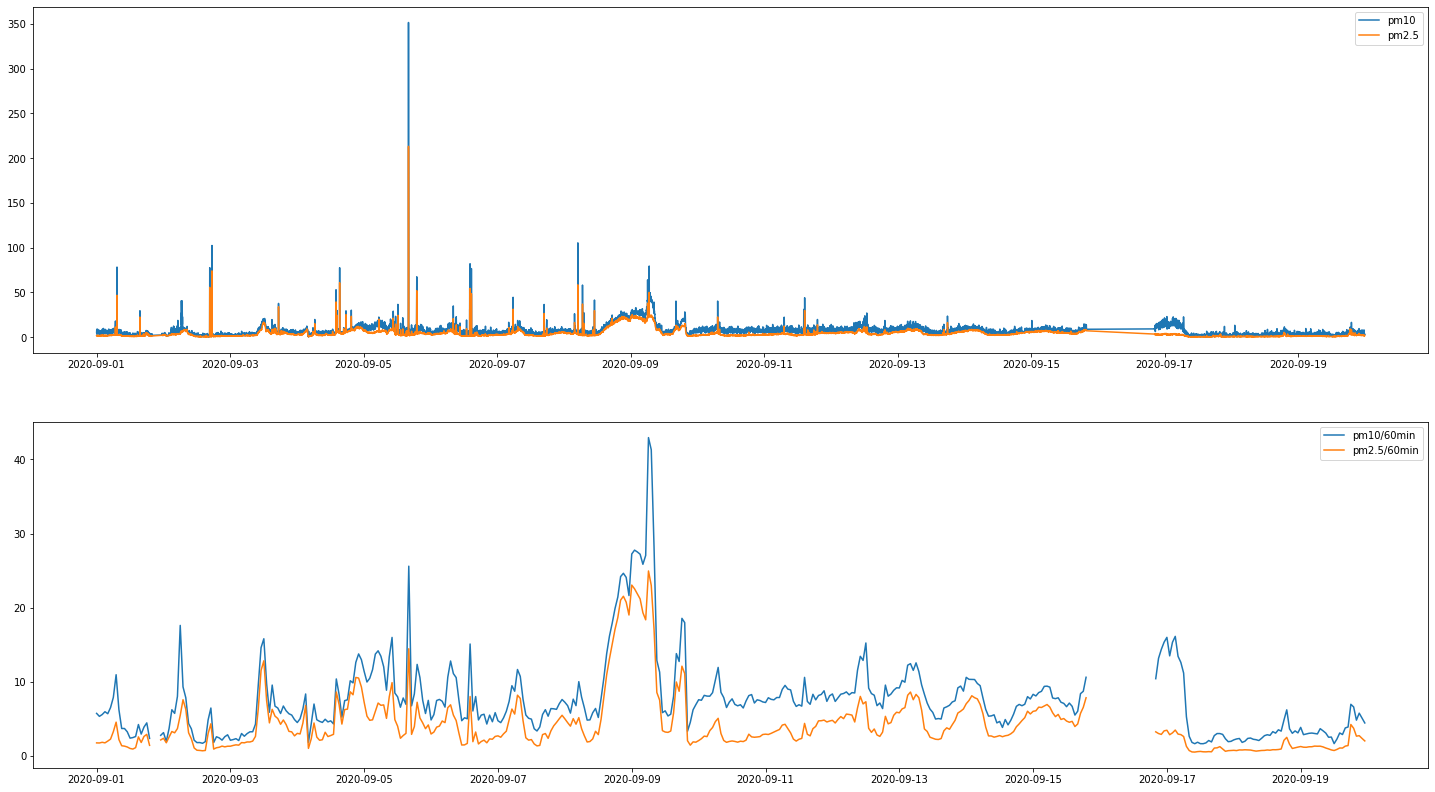

In [8]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

## Multiple Sensors

In [9]:
def get_sensor_data(SensorList):  
    SensorData = {}
    for sensor in SensorList:
        print(sensor)
        date = datetime.datetime.strptime('2020-09-05', '%Y-%m-%d').date()
        test = []
        comp = []
        while date < datetime.datetime.now().date():
            d = date.strftime('%Y-%m-%d')
            print(d)
            try:
                test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
            except:
                print("\tdoes not exist jet")
                break
            date += datetime.timedelta(days = 1)
        try:
            comp = test[0]
            for i in range(1, len(test)):
                comp = pd.concat([comp, test[i]], axis = 0)
            comp['timestamp'] = pd.to_datetime(comp['timestamp'])
            comp = comp.set_index('timestamp')
        except:
            print("\tno data")
        SensorData[sensor] = comp
    return SensorData

In [10]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]
SensorData = get_sensor_data(SensorList[-5:])

11224
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
	does not exist jet
9547
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
	does not exist jet
564
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
	does not exist jet
31035
2020-09-05
	does not exist jet
	no data
4857
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
	does not exist jet


In [11]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-05 00:04:27,4857,SDS011,2443,51.978,8.472,10.15,NaN,NaN,5.28,NaN,NaN
2020-09-05 00:09:23,4857,SDS011,2443,51.978,8.472,9.30,NaN,NaN,4.62,NaN,NaN
2020-09-05 00:14:20,4857,SDS011,2443,51.978,8.472,9.57,NaN,NaN,5.18,NaN,NaN
2020-09-05 00:19:16,4857,SDS011,2443,51.978,8.472,7.35,NaN,NaN,4.32,NaN,NaN
2020-09-05 00:24:12,4857,SDS011,2443,51.978,8.472,4.95,NaN,NaN,4.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19 23:36:58,4857,SDS011,2443,51.978,8.472,1.77,NaN,NaN,1.35,NaN,NaN
2020-09-19 23:41:54,4857,SDS011,2443,51.978,8.472,5.00,NaN,NaN,1.50,NaN,NaN
2020-09-19 23:46:50,4857,SDS011,2443,51.978,8.472,3.08,NaN,NaN,1.27,NaN,NaN


## Getting a list of all sensors located in OWL

In [12]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
sensor_df = pd.DataFrame(rdata)

In [13]:
df = sensor_df.copy()

In [14]:
# longitudes
longitude_min = 8.3255 #north
longitude_max = 9.5537

# latitudes
latitude_max = 52.2396 #west
latitude_min = 51.4762

In [15]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [16]:
df = df[df['sensor'].map(lambda x: 'SDS011' in x['sensor_type'].values())]

In [17]:
df.shape

(11440, 6)

In [18]:
longitude = df['location'].apply(lambda x: x.get('longitude'))
latitude = df['location'].apply(lambda x: x.get('latitude'))

In [19]:
df = df.assign(longitude = longitude.values)
df = df.assign(latitude = latitude.values)

In [20]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues,longitude,latitude
14,1941658863,NaN,2020-09-20 22:23:02,"{'id': 35067, 'latitude': '48.134', 'longitude...","{'id': 49235, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043626, 'value': '8.30', 'value_ty...",8.378,48.134
15,1941658862,NaN,2020-09-20 22:23:02,"{'id': 17450, 'latitude': '48.654', 'longitude...","{'id': 30699, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043623, 'value': '0.40', 'value_ty...",9.22,48.654
16,1941658861,NaN,2020-09-20 22:23:02,"{'id': 1461, 'latitude': '51.978', 'longitude'...","{'id': 2902, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4190043622, 'value': '6.57', 'value_ty...",9.286,51.978
19,1941658858,NaN,2020-09-20 22:23:02,"{'id': 30545, 'latitude': '52.024', 'longitude...","{'id': 33026, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043615, 'value': '5.55', 'value_ty...",8.524,52.024
20,1941658857,NaN,2020-09-20 22:23:02,"{'id': 8923, 'latitude': '49.358', 'longitude'...","{'id': 17608, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043613, 'value': '0.83', 'value_ty...",7.132,49.358
...,...,...,...,...,...,...,...,...
45935,1941612693,NaN,2020-09-20 22:17:53,"{'id': 16119, 'latitude': '52.51410871675', 'l...","{'id': 29024, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189943508, 'value': '8.98', 'value_ty...",13.71683567762,52.51410871675
45936,1941612692,NaN,2020-09-20 22:17:53,"{'id': 14501, 'latitude': '52.282', 'longitude...","{'id': 26946, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189943506, 'value': '4.95', 'value_ty...",10.56,52.282
45937,1941612691,NaN,2020-09-20 22:17:53,"{'id': 6146, 'latitude': '48.128', 'longitude'...","{'id': 12165, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189943504, 'value': '10.00', 'value_t...",11.476,48.128
45940,1941612688,NaN,2020-09-20 22:17:53,"{'id': 2396, 'latitude': '53.582', 'longitude'...","{'id': 4764, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4189943498, 'value': '11.10', 'value_t...",9.946,53.582


In [21]:
df.drop(['location', 'sampling_rate', 'id'], axis = 1, inplace = True)
df

,timestamp,sensor,sensordatavalues,longitude,latitude
14,2020-09-20 22:23:02,"{'id': 49235, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043626, 'value': '8.30', 'value_ty...",8.378,48.134
15,2020-09-20 22:23:02,"{'id': 30699, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043623, 'value': '0.40', 'value_ty...",9.22,48.654
16,2020-09-20 22:23:02,"{'id': 2902, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4190043622, 'value': '6.57', 'value_ty...",9.286,51.978
19,2020-09-20 22:23:02,"{'id': 33026, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043615, 'value': '5.55', 'value_ty...",8.524,52.024
20,2020-09-20 22:23:02,"{'id': 17608, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043613, 'value': '0.83', 'value_ty...",7.132,49.358
...,...,...,...,...,...
45935,2020-09-20 22:17:53,"{'id': 29024, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189943508, 'value': '8.98', 'value_ty...",13.71683567762,52.51410871675
45936,2020-09-20 22:17:53,"{'id': 26946, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189943506, 'value': '4.95', 'value_ty...",10.56,52.282
45937,2020-09-20 22:17:53,"{'id': 12165, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189943504, 'value': '10.00', 'value_t...",11.476,48.128
45940,2020-09-20 22:17:53,"{'id': 4764, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4189943498, 'value': '11.10', 'value_t...",9.946,53.582


In [24]:
df['longitude'] = pd.to_numeric(df.longitude)
df['latitude'] = pd.to_numeric(df.latitude)
df = df[df.longitude <= longitude_max]
df = df[df.longitude >= longitude_min]
df = df[df.latitude <= latitude_max]
df = df[df.latitude >= latitude_min]

In [25]:
df.reset_index(inplace = True, drop = True)

In [26]:
df['SensorID'] = df['sensor'].apply(lambda x: x.get('id'))
df

,timestamp,sensor,sensordatavalues,longitude,latitude,SensorID
0,2020-09-20 22:23:02,"{'id': 2902, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4190043622, 'value': '6.57', 'value_ty...",9.286,51.978,2902
1,2020-09-20 22:23:02,"{'id': 33026, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190043615, 'value': '5.55', 'value_ty...",8.524,52.024,33026
2,2020-09-20 22:22:59,"{'id': 10874, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190042464, 'value': '5.73', 'value_ty...",8.786,52.200,10874
3,2020-09-20 22:22:59,"{'id': 21004, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190042425, 'value': '313.83', 'value_...",8.754,51.712,21004
4,2020-09-20 22:22:56,"{'id': 24014, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4190041521, 'value': '6.87', 'value_ty...",8.368,51.712,24014
...,...,...,...,...,...,...
221,2020-09-20 22:18:05,"{'id': 24014, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189946534, 'value': '6.93', 'value_ty...",8.368,51.712,24014
222,2020-09-20 22:17:56,"{'id': 15230, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189944716, 'value': '5.30', 'value_ty...",8.564,51.762,15230
223,2020-09-20 22:17:56,"{'id': 8474, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4189944600, 'value': '3.50', 'value_ty...",8.448,52.012,8474
224,2020-09-20 22:17:55,"{'id': 33814, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4189944218, 'value': '4.80', 'value_ty...",8.406,51.910,33814


### Plotting Sensor Locations on a map of OWL

In [27]:
boundingBox = (longitude_min, longitude_max, latitude_min, latitude_max)
boundingBox

(8.3255, 9.5537, 51.4762, 52.2396)

In [28]:
owl_map = plt.imread('map.png')

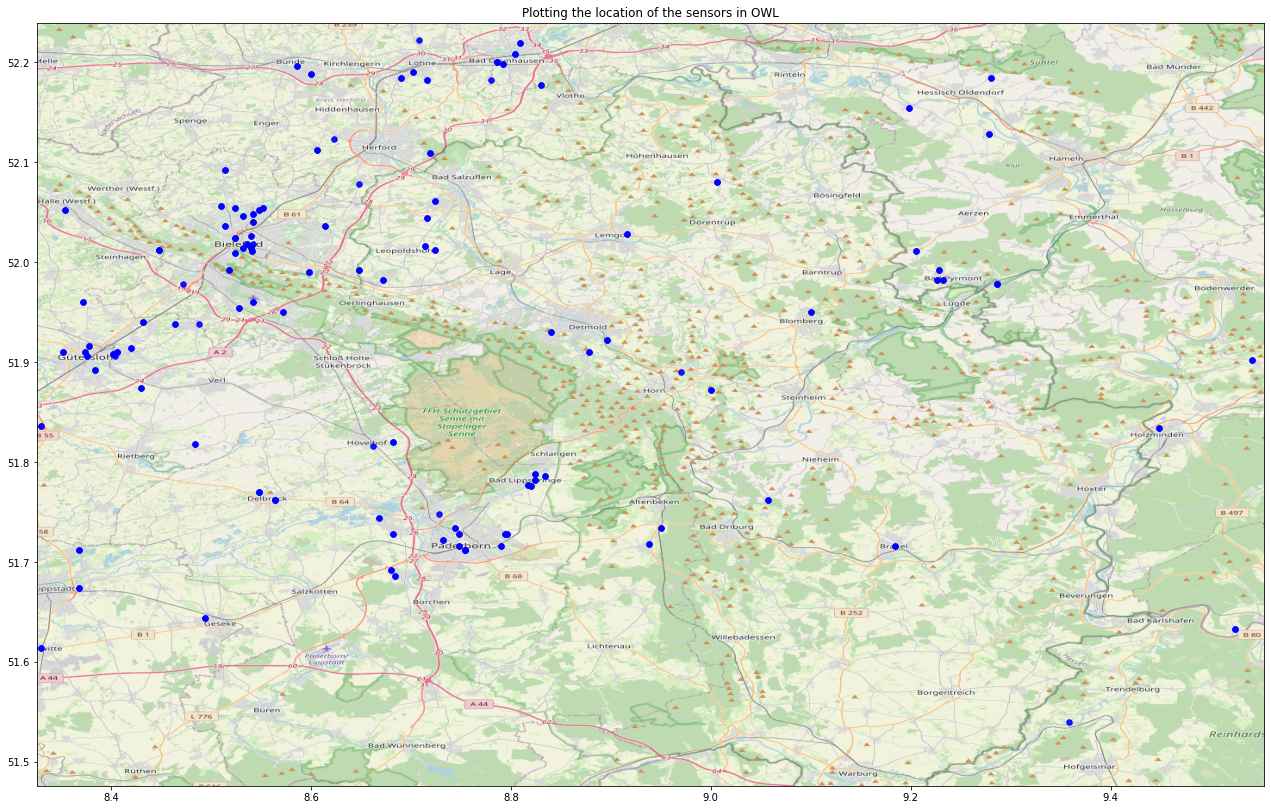

In [29]:
fig, ax = plt.subplots(figsize = (22, 40))

ax.scatter(df.longitude, df.latitude, zorder = 1, alpha = 0.9, c = 'b', s = 30)

ax.set_title('Plotting the location of the sensors in OWL')
ax.set_xlim(boundingBox[0], boundingBox[1])
ax.set_ylim(boundingBox[2], boundingBox[3])

ax.imshow(owl_map, zorder = 0, extent = boundingBox)

In [30]:
sensorList = set(df['SensorID'])
len(sensorList)

114

In [31]:
df['sensordatavalues'][0]

[{'id': 4190043622, 'value': '6.57', 'value_type': 'P1'},
 {'id': 4190043624, 'value': '6.07', 'value_type': 'P2'}]

In [32]:
df.sensordatavalues[0][0]

{'id': 4190043622, 'value': '6.57', 'value_type': 'P1'}

In [33]:
p1 = df['sensordatavalues'].apply(lambda x: x[0]).apply(lambda x: x.get('value'))
p2 = df['sensordatavalues'].apply(lambda x: x[1]).apply(lambda x: x.get('value'))

In [34]:
p1[0]

'6.57'

In [35]:
p2[0]

'6.07'

In [36]:
df['P1'] = p1
df['P2'] = p2

In [37]:
df.drop(['sensor', 'sensordatavalues'], axis = 1, inplace = True)

In [38]:
df

,timestamp,longitude,latitude,SensorID,P1,P2
0,2020-09-20 22:23:02,9.286,51.978,2902,6.57,6.07
1,2020-09-20 22:23:02,8.524,52.024,33026,5.55,3.08
2,2020-09-20 22:22:59,8.786,52.200,10874,5.73,3.73
3,2020-09-20 22:22:59,8.754,51.712,21004,313.83,295.52
4,2020-09-20 22:22:56,8.368,51.712,24014,6.87,3.30
...,...,...,...,...,...,...
221,2020-09-20 22:18:05,8.368,51.712,24014,6.93,3.90
222,2020-09-20 22:17:56,8.564,51.762,15230,5.30,4.00
223,2020-09-20 22:17:56,8.448,52.012,8474,3.50,3.20
224,2020-09-20 22:17:55,8.406,51.910,33814,4.80,3.53
